In [1]:
import pandas as pd
import numpy as np
#import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
opportunities = pd.read_csv("Entrenamieto_ECI_2020.csv")

# Cantidad de apariciones de cada tipo de oportunidad

In [3]:
opportunities.drop_duplicates(subset="Opportunity_ID",inplace=True)
opTypes = opportunities[["Opportunity_Type","Opportunity_ID"]].groupby("Opportunity_Type").agg({"Opportunity_ID":"count"})
opTypes.rename(columns={"Opportunity_ID":"Cantidad"},inplace=True)
opTypes.reset_index(inplace=True)
opTypes.sort_values(by="Cantidad",inplace=True)
opTypes = opTypes[opTypes["Cantidad"] > 100]
opTypes

,Opportunity_Type,Cantidad
13,Opportunity_Type_20,135
4,Opportunity_Type_12,138
18,Opportunity_Type_3,183
23,Opportunity_Type_8,735
11,Opportunity_Type_19,1287
22,Opportunity_Type_7,1998
1,Opportunity_Type_1,5160


[Text(0, 0, 'Opportunity_Type_20'),
 Text(0, 0, 'Opportunity_Type_12'),
 Text(0, 0, 'Opportunity_Type_3'),
 Text(0, 0, 'Opportunity_Type_8'),
 Text(0, 0, 'Opportunity_Type_19'),
 Text(0, 0, 'Opportunity_Type_7'),
 Text(0, 0, 'Opportunity_Type_1')]

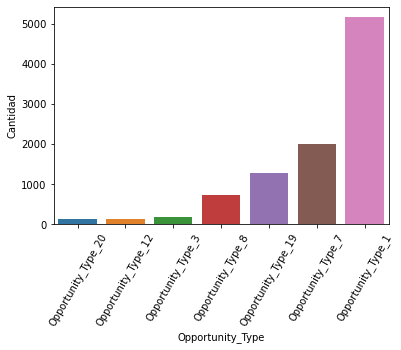

In [4]:
plot = sns.barplot(x="Opportunity_Type",y="Cantidad",data=opTypes)
plot.set_xticklabels(plot.get_xticklabels(), rotation=60)

# OP TYPE VS STAGE

In [7]:
opTypeVsStage = opportunities.groupby(["Opportunity_Type","Stage"]).agg({"Opportunity_ID":"count"})#Consigo la cantidad de veces de cada OT por cada source
opTypeVsStage = opTypeVsStage.reset_index()
#opTypeVsStage["Opportunity_Type"] = opTypeVsStage["Opportunity_Type"].apply(lambda x: x.replace("Opportunity_Type_",""))
opTypeVsStage.rename(columns={"Opportunity_ID":"Cantidad"},inplace = True)
total = opTypeVsStage.groupby("Opportunity_Type").agg({"Cantidad":"sum"}) #La cantidad total de veces que aparece OT
opTypeVsStage.set_index("Opportunity_Type",inplace=True)
opTypeVsStage["Total"] = total["Cantidad"]
opTypeVsStage = opTypeVsStage[opTypeVsStage["Total"]>100]#Filtro a los q tienen mas de 100 entradas
opTypeVsStage.reset_index(inplace=True)
opTypeVsStage = opTypeVsStage[(opTypeVsStage["Stage"]=="Closed Won") | (opTypeVsStage["Stage"]=="Closed Lost")]
opTypeVsStage

,Opportunity_Type,Stage,Cantidad,Total
0,Opportunity_Type_1,Closed Lost,2460,5160
1,Opportunity_Type_1,Closed Won,2668,5160
5,Opportunity_Type_12,Closed Lost,16,138
6,Opportunity_Type_12,Closed Won,122,138
7,Opportunity_Type_19,Closed Lost,1075,1287
8,Opportunity_Type_19,Closed Won,202,1287
12,Opportunity_Type_20,Closed Lost,105,135
13,Opportunity_Type_20,Closed Won,30,135
14,Opportunity_Type_3,Closed Lost,100,183
15,Opportunity_Type_3,Closed Won,82,183


[Text(0, 0, 'Opportunity_Type_1'),
 Text(0, 0, 'Opportunity_Type_12'),
 Text(0, 0, 'Opportunity_Type_19'),
 Text(0, 0, 'Opportunity_Type_20'),
 Text(0, 0, 'Opportunity_Type_3'),
 Text(0, 0, 'Opportunity_Type_7'),
 Text(0, 0, 'Opportunity_Type_8')]

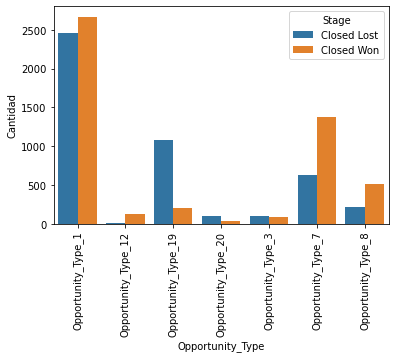

In [9]:
plot = sns.barplot(x="Opportunity_Type",y="Cantidad",hue="Stage",data=opTypeVsStage)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

# Op Types vs ASP

In [13]:
opTypesVsASP = opportunities[["Opportunity_Type","ASP_(converted)","Opportunity_ID"]].groupby("Opportunity_Type").\
            agg({"ASP_(converted)":"mean","Opportunity_ID":"count"})
opTypesVsASP.rename(columns={"Opportunity_ID":"Cantidad"},inplace=True)
opTypesVsASP.reset_index(inplace=True)
opTypesVsASP.sort_values(by="Cantidad",inplace=True)
opTypesVsASP = opTypesVsASP[opTypesVsASP["Cantidad"] > 100]
opTypesVsASP

,Opportunity_Type,ASP_(converted),Cantidad
13,Opportunity_Type_20,0.418260,135
4,Opportunity_Type_12,0.349652,138
18,Opportunity_Type_3,0.404088,183
23,Opportunity_Type_8,0.432679,735
11,Opportunity_Type_19,0.469482,1287
22,Opportunity_Type_7,0.431177,1998
1,Opportunity_Type_1,0.440101,5160


[Text(0, 0, 'Opportunity_Type_20'),
 Text(0, 0, 'Opportunity_Type_12'),
 Text(0, 0, 'Opportunity_Type_3'),
 Text(0, 0, 'Opportunity_Type_8'),
 Text(0, 0, 'Opportunity_Type_19'),
 Text(0, 0, 'Opportunity_Type_7'),
 Text(0, 0, 'Opportunity_Type_1')]

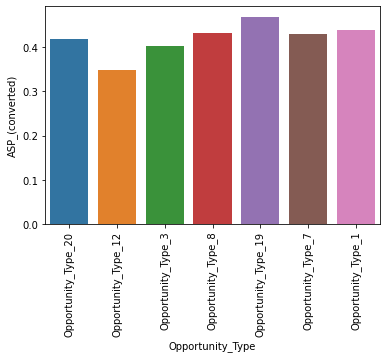

In [16]:
plot = sns.barplot(x="Opportunity_Type",y="ASP_(converted)",data=opTypesVsASP)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)